## Regression Intro

In [282]:
import pandas as pd
import yfinance as yf
import math
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import datetime
import pickle



In [283]:
df = yf.download('GOOGL', start='2010-01-01', end='2024-12-31')
print(df.head())

# high minus low percent
df["HL_PCT"] = (df['High'] - df['Low']) / df['Low'] * 100

# daily percent change
df["PCT_change"] = (df['Close'] - df['Open']) / df['Open'] * 100

print(df.head())

df = df[['Close','HL_PCT',"PCT_change",'Volume']]
print(df.head())

forecast_col = 'Close'
df.fillna(-99999, inplace=True) # it helps to keep data as an outlier instead of get rid of the data points
forecast_out = int(math.ceil(0.1*len(df)))

df['label'] = df['Close'].shift(-forecast_out)
df.dropna(inplace=True)
print(df.tail(10))

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL
Date                                                             
2010-01-04  15.609804  15.678545  15.547291  15.614785   78169752
2010-01-05  15.541064  15.636953  15.480045  15.620515  120067812
2010-01-06  15.149293  15.587637  15.101972  15.587637  158988852
2010-01-07  14.796625  15.192631  14.760512  15.177686  256315428
2010-01-08  14.993881  15.024515  14.672344  14.744323  188783028
Price           Close       High        Low       Open     Volume    HL_PCT   
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL             
Date                                                                          
2010-01-04  15.609804  15.678545  15.547291  15.614785   78169752  0.844225  \
2010-01-05  15.541064  15.636953  15.480045  15.620515  120067812  1.013611   
2010-01-06  15.149293  15.587637  15.101972  15.587637  158988852  3.215908  

In [284]:
# Data Preprocessing

X = np.array(df[['Close','HL_PCT',"PCT_change",'Volume']])
y = np.array(df['label'])

X = preprocessing.scale(X)
X = X[:-forecast_out+1]
X_lately = X[-forecast_out:]
y = y[:-forecast_out+1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [285]:
# Train Model

lm = LinearRegression(n_jobs=-1)
# lm = LinearRegression()
svm_model_line = SVR()
svm_model_poly = SVR(kernel="poly")

lm.fit(X_train, y_train)
svm_model_line.fit(X_train, y_train)
svm_model_poly.fit(X_train, y_train)

with open("linearregression.pickle",'wb') as f:
    pickle.dump(lm, f)
with open("SVMlinear.pickle","wb") as f:
    pickle.dump(svm_model_line, f)
with open("SVMpoly.pickle","wb") as f:
    pickle.dump(svm_model_poly, f)

In [286]:
# Calling Saved Model

pickle_lm = open('linearregression.pickle','rb')
lm = pickle.load(pickle_lm)
pickle_SVMlinear = open('SVMlinear.pickle','rb')
lm = pickle.load(pickle_SVMlinear)
pickle_SVMpoly = open('SVMpoly.pickle','rb')
lm = pickle.load(pickle_SVMpoly)

In [287]:
accuracy_line = lm.score(X_test, y_test)
accuracy_svm_line = svm_model_line.score(X_test, y_test)
accuracy_svm_poly = svm_model_poly.score(X_test, y_test)

print(accuracy_line, accuracy_svm_line, accuracy_svm_poly, forecast_out)

-0.20016730895888601 0.798300706621752 -0.20016730895888601 378


In [288]:
forecast_set = lm.predict(X_lately)
print(forecast_set)

[ 60.50883487  59.2006355   56.67906198  54.12641998  52.77572924
  51.5064588   54.20735298  67.60286299 108.21295901  65.19096197
  57.93076544  54.87378214  51.78826607 147.62417568  66.67299414
  53.65296969 117.98285392  53.49101148  54.94864481  56.76427528
  58.20326828  87.05906371  56.63213894  51.54846748  54.06184611
  51.38206201  64.39159637  56.43744627  54.60502504  55.85471372
  57.00757944  54.5420461   52.69981668  52.14948478  67.36734926
  53.89750735  85.33239316  53.3231378   56.9702959   62.64867867
  87.11050977  57.92605807  54.76141532  54.84771907  61.59474516
 131.17893157 212.75954472 144.39083588  54.0526185   53.95614309
  77.61485587  64.73461665  72.46233405  54.55179449  74.22427441
  54.66906562  94.40539139  52.91891721  55.59764307  91.6568411
  59.78146508  59.74653715  53.7816527   51.2016821   52.2127413
  51.45370078  53.50476638  56.08750767  65.65779124  54.75230148
  54.47820925  54.56893719  85.83144546  53.03173978  58.81916778
  54.9548139

In [289]:
df["Forecast"] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = next_unix
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    


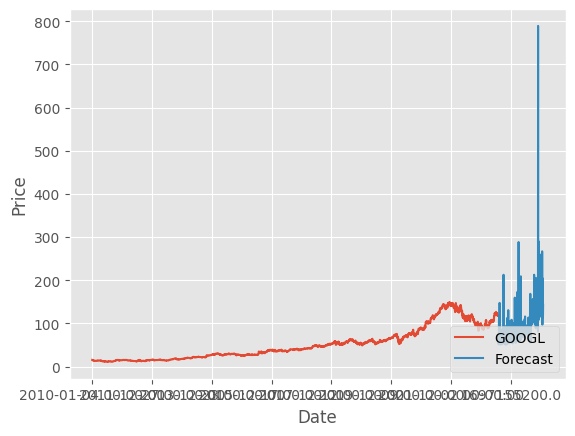

In [290]:
df['Close'].plot()
df["Forecast"].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## How to program the Best Fit Slope 

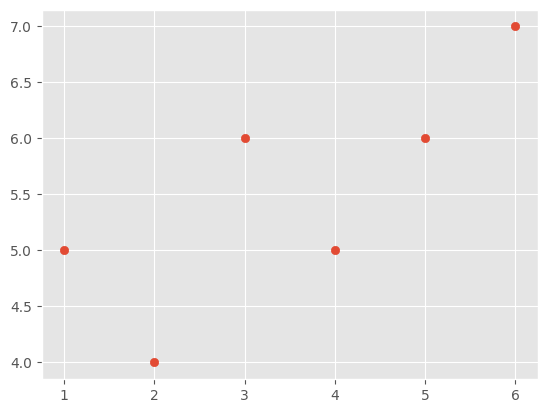

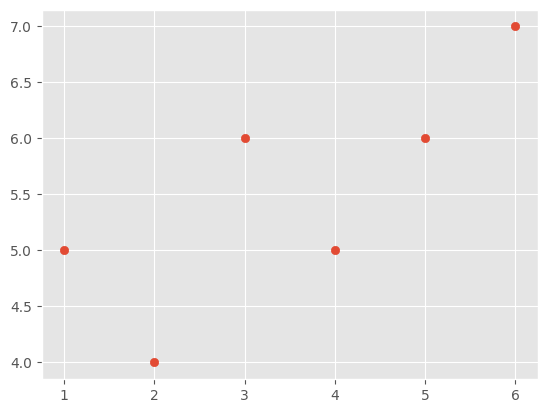

In [258]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random

x = [1,2,3,4,5,6]
y = [5,4,6,5,6,7]

plt.scatter(x,y)
plt.show()

xs = np.array(x,dtype=np.float64)
ys = np.array(y,dtype=np.float64)

plt.scatter(xs,ys)


1.0536938397133409 1122.5040701851929 1.0536938397133409 1122.5040701851929
0.19195657425117352


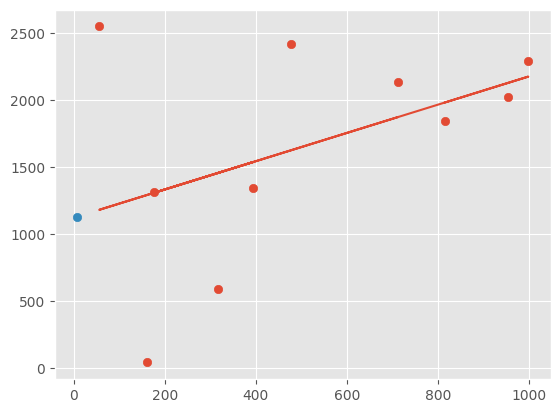

In [267]:
def slope(x,y):
    m = ( (mean(x) * mean(y)) - mean(x*y) ) / ( (mean(x))**2 - mean(x*x) )
    return m

def intercept(x,y,m):
    b = mean(y) - m * mean(x)
    return b

def slope_intercept(x,y):
    m = ( (mean(x) * mean(y)) - mean(x*y) ) / ( (mean(x))**2 - mean(x*x) )
    b = mean(y) - m * mean(x)
    return m,b

def mse(y_org,y_line):
    return sum( (y_org - y_line)**2 )

def R2(y_org,y_line):
    y_mean_line = [mean(y_org) for y in y_org]
    mse_line = mse(y_org,y_line)
    mse_mean = mse(y_org,y_mean_line)
    return 1 - (mse_line / mse_mean)

def rand(total,beg,end):
    x = []
    y = []
    for i in range(total):
        x.append(random.randint(beg, end))
        y.append(random.randint(beg, 3*end))
    return np.array(x,dtype=np.float64), np.array(y,dtype=np.float64)

xs, ys = rand(10,1,1000)

m = slope(xs,ys)
b = intercept(xs,ys,m)
slope_m, intercept_b = slope_intercept(xs,ys)

print(m,b, slope_m, intercept_b)

y_line = [(m*x+b) for x in xs]

predict_x = 8
predict_y = m*predict_x + b

r_squared = R2(ys,y_line)
print(r_squared)

plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y)
plt.plot(xs,y_line)
plt.show()